# **AI Lab 04 Tasks - Search Algorithms**


### **Question 1: Comparing UCS with BFS**
A delivery drone needs to transport a package from a warehouse **(Node A)** to a customer's location **(Node F)**. The city has multiple possible routes, and each route has a different fuel cost based on distance, wind resistance, and obstacles.
Your task is to implement the **Uniform Cost Search (UCS) algorithm** and **BFS** to find the optimal path from a warehouse to a customer in a city graph.

### **Instructions:**
1. Implement **Uniform Cost Search (UCS)** to find the **least-cost path**.
2. Implement **Breadth-First Search (BFS)**.
3. Compare both approaches and answer these questions below (in text form only):
   - **Which algorithm finds the shortest path?**
   - **Which one is more efficient in terms of cost and number of explored nodes?**
4. Use the following city graph:
   - Nodes: A (Warehouse), B, C, D, E, F (Customer)
   - Edges (with travel costs):
   - Initial Node: A
   - Goal Node: F

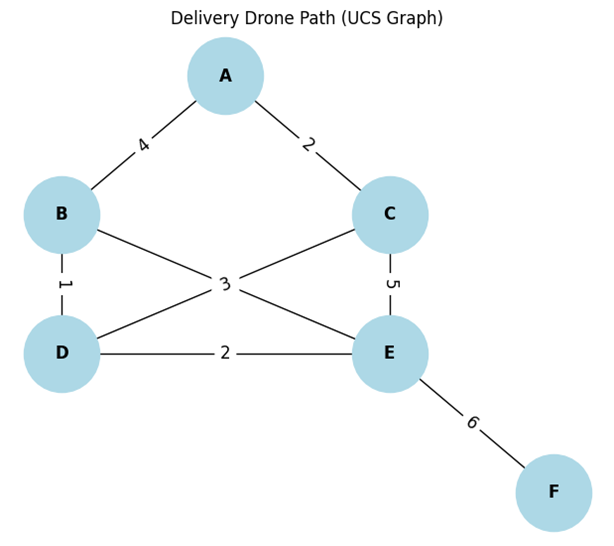


In [1]:
# Graph with paths (cost represents fuel usage)
city_graph = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('D', 1), ('E', 3)],
    'C': [('A', 2), ('E', 5), ('D', 3)],
    'D': [('B', 1), ('C', 3), ('E', 2)],
    'E': [('B', 3), ('C', 5), ('D', 2), ('F', 6)],
    'F': [('E', 6)]
}


In [18]:
import heapq

def uniform_cost_search(graph, start, goal):
    ## TODO: Implement Uniform Cost Search (UCS) to find the least-cost path.

    # Initialize the priority queue (use heapq)
    priority_queue = [(0, start, [start])]  # Format: (cost, node, path)

    # Initialize an empty set to track visited nodes
    visited = set()

    while priority_queue:
        # Get the node with the lowest cost
        cost, node, path = heapq.heappop(priority_queue)
        # TODO: If the goal is reached, return the path and total cost
        # TODO: Mark node as visited (to prevent cycles)
        # TODO: Expand neighbors and add them to the priority queue with updated cost

        if node == goal:
            return path, cost

        if node not in visited:
            visited.add(node)
            for neighbor, weight in graph[node]:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path + [neighbor]))

    return None, float('inf')  # Return failure if no path is found



### **BFS Starting code**

In [12]:
from collections import deque

def bfs(graph, start, goal):
    ## TODO: Implement Breadth-First Search (BFS) to find a path from start to goal.

    # Initialize queue
    queue = deque([(start, [start])])

    # Initialize visited set
    visited = set()

    while queue:
        # Step 3: Get the next node from the queue
        node, path = queue.popleft()

        # TODO: If goal is found, return the path
        if node == goal:
            return path
        # TODO: Mark node as visited
        visited.add(node)
        # TODO: Expand neighbors and add them to the queue
        for neighbor, _ in graph[node]:
            if neighbor not in visited:
              queue.append((neighbor, path + [neighbor]))
    return None  # Return failure if no path is found


In [19]:
start_location = 'A'  # Warehouse
goal_location = 'F'   # Customer's location

# Run UCS (after implementation)
ucs_path, ucs_cost = uniform_cost_search(city_graph, start_location, goal_location)
print("UCS Optimal Path:", " → ".join(ucs_path) if ucs_path else "No Path Found")
print("UCS Total Cost:", ucs_cost)

# Run BFS (after implementation)
bfs_path = bfs(city_graph, start_location, goal_location)
print("\nBFS Path:", " → ".join(bfs_path) if bfs_path else "No Path Found")


UCS Optimal Path: A → B → D → E → F
UCS Total Cost: 13

BFS Path: A → B → E → F


In [ ]:
### **Expected Output:**
# Your code should return:
# - The **optimal path found by UCS and its total cost**.
# - The **path found by BFS/DFS**.

### **Question 2: GREEDY SEARCH ALGORITHM**
Imagine you are designing an AI-based puzzle solver for a digital **8-puzzle** game. The game consists of a **3×3 board** with numbered tiles from 1 to 8 and one empty space (_). The goal is to move tiles one step at a time into the empty space until the board matches the goal state.

**Initial State (Example):**

1  2  3  
_  4  6  
7  5  8  


**Goal State:**

1  2  3  
4  5  6  
7  8  _  

### **Your Task:**
Implement **Greedy Best-First Search (GBFS)** to solve this problem using the number of **Manhattan Distance Heuristic**. The algorithm should always expand the tile arrangement with the lowest heuristic value to reach the goal as quickly as possible.


In [28]:
import heapq
import copy

# Initial state
start_state = [
    [1, 2, 3],
    [0, 4, 6],
    [7, 5, 8]
]

# Goal state
goal_state = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
]

def heuristic(state, goal):
    # Manhattan Distance heuristic
    distance = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                x_goal, y_goal = find_position(goal, state[i][j])
                distance += abs(i - x_goal) + abs(j - y_goal)
    return distance

def find_position(state, value):
    for i in range(3):
        for j in range(3):
            if state[i][j] == value:
                return i, j

def get_neighbors(state):
    neighbors = []
    x, y = find_position(state, 0)
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_state = copy.deepcopy(state)
            new_state[x][y], new_state[nx][ny] = new_state[nx][ny], new_state[x][y]
            neighbors.append(new_state)

    return neighbors


def greedy_best_first_search(start, goal):
    priority_queue = []
    heapq.heappush(priority_queue, (heuristic(start, goal), start, []))
    visited = set()

    while priority_queue:
        _, state, path = heapq.heappop(priority_queue)

        if state == goal:
            return path + [state]

        state_tuple = tuple(map(tuple, state))
        if state_tuple in visited:
            continue
        visited.add(state_tuple)

        for neighbor in get_neighbors(state):
            heapq.heappush(priority_queue, (heuristic(neighbor, goal), neighbor, path + [state]))

    return None



# Execute search
solution_path = greedy_best_first_search(start_state, goal_state)
if solution_path:
    for step in solution_path:
        for row in step:
            print(row)
        print("---------")
else:
    print("No solution found.")

[1, 2, 3]
[0, 4, 6]
[7, 5, 8]
---------
[1, 2, 3]
[4, 0, 6]
[7, 5, 8]
---------
[1, 2, 3]
[4, 5, 6]
[7, 0, 8]
---------
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
---------
